In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
# read pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)


In [6]:
ball_positions

[{},
 {1: [892.0442504882812,
   615.3441162109375,
   912.3057861328125,
   637.1387939453125]},
 {},
 {1: [861.4742431640625,
   646.6547241210938,
   880.6034545898438,
   669.1234130859375]},
 {},
 {1: [837.5592041015625,
   669.8305053710938,
   854.51806640625,
   689.0428466796875]},
 {1: [820.8353271484375,
   686.2620239257812,
   838.5623779296875,
   705.1744384765625]},
 {1: [813.8856811523438,
   694.4121704101562,
   831.1030883789062,
   714.8797607421875]},
 {1: [796.6531982421875, 717.837890625, 813.6890869140625, 737.1553344726562]},
 {1: [777.1008911132812,
   741.4940185546875,
   799.7345581054688,
   765.654052734375]},
 {1: [766.44091796875,
   757.0535888671875,
   789.7996826171875,
   781.5661010742188]},
 {1: [778.3875732421875,
   718.2691650390625,
   796.6285400390625,
   738.9515380859375]},
 {1: [788.8836669921875,
   670.405029296875,
   806.75634765625,
   691.5902099609375]},
 {1: [793.2786254882812,
   646.1519775390625,
   812.9899291992188,
   668.

In [7]:
# list of bboxes that has empty position if there was no detection
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert list into pandas dataframe to use interploate and bfill functions
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

# interpolate missing values between two frames
df_ball_positions = df_ball_positions.interpolate()
# duplicate earliest detection to the start of frames (backfill) to fix no detection in first frame
df_ball_positions = df_ball_positions.bfill()

In [8]:
df_ball_positions

,x1,y1,x2,y2
0,892.044250,615.344116,912.305786,637.138794
1,892.044250,615.344116,912.305786,637.138794
2,876.759247,630.999420,896.454620,653.131104
3,861.474243,646.654724,880.603455,669.123413
4,849.516724,658.242615,867.560760,679.083130
...,...,...,...,...
209,1185.187744,248.015945,1199.016602,265.331299
210,1185.098267,233.742325,1195.532349,244.362625
211,1183.799072,227.071045,1195.488892,241.684692
212,1181.110352,213.584106,1194.123535,228.095673


In [11]:
# calculate ball center
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['mid_x'] = (df_ball_positions['x1'] + df_ball_positions['x2']) / 2
df_ball_positions['mid_x_rolling_mean'] = df_ball_positions['mid_x'].rolling(window=5, min_periods=1, center=False).mean()

In [12]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_x,mid_y_rolling_mean,mid_x_rolling_mean
0,892.044250,615.344116,912.305786,637.138794,626.241455,902.175018,626.241455,902.175018
1,892.044250,615.344116,912.305786,637.138794,626.241455,902.175018,626.241455,902.175018
2,876.759247,630.999420,896.454620,653.131104,642.065262,886.606934,631.516057,896.985657
3,861.474243,646.654724,880.603455,669.123413,657.889069,871.038849,638.109310,890.498955
4,849.516724,658.242615,867.560760,679.083130,668.662872,858.538742,644.220023,884.106912
...,...,...,...,...,...,...,...,...
209,1185.187744,248.015945,1199.016602,265.331299,256.673622,1192.102173,283.125734,1199.778015
210,1185.098267,233.742325,1195.532349,244.362625,239.052475,1190.315308,269.020660,1196.350305
211,1183.799072,227.071045,1195.488892,241.684692,234.377869,1189.643982,256.625876,1193.555914
212,1181.110352,213.584106,1194.123535,228.095673,220.839890,1187.616943,244.168707,1191.123700


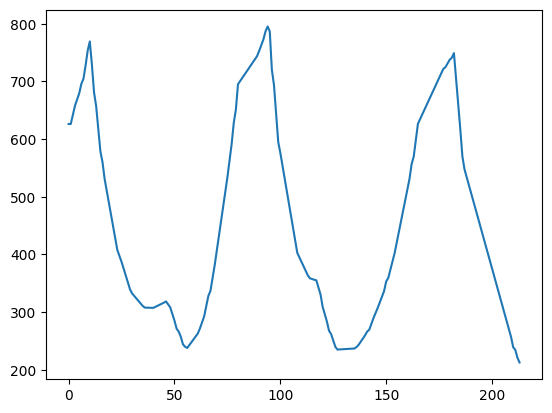

In [13]:
# plot mid_y
plt.plot(df_ball_positions['mid_y'])

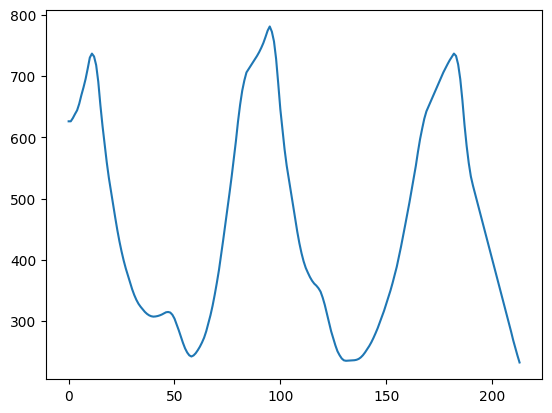

In [14]:
# plot mid_y_rolling_mean 
plt.plot(df_ball_positions['mid_y_rolling_mean'])

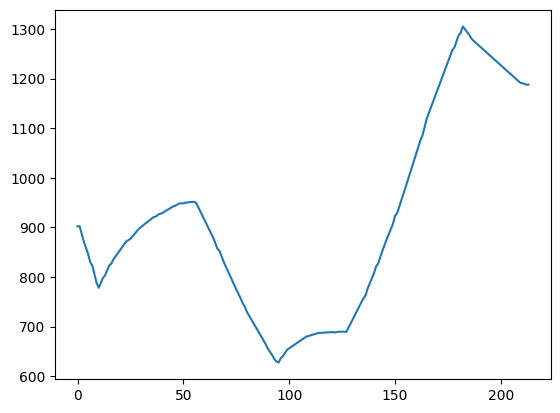

In [15]:
# plot mid_x
plt.plot(df_ball_positions['mid_x'])

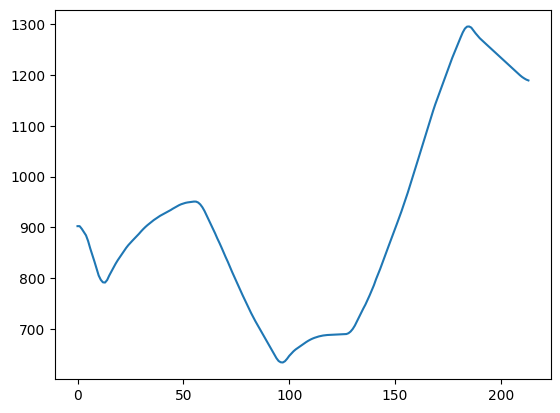

In [16]:
# plot mid_x_rolling_mean 
plt.plot(df_ball_positions['mid_x_rolling_mean'])

In [21]:
# find when ball was hit
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

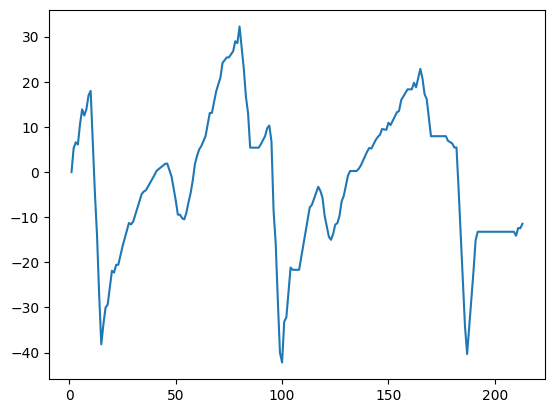

In [22]:
# plot delta_y 
plt.plot(df_ball_positions['delta_y'])

In [23]:
df_ball_positions['ball_hit'] = 0

In [28]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
minimum_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1
        
        if change_count > minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1
            
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.to_list()



C:\Users\T3500\AppData\Local\Temp\ipykernel_42804\1999657340.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\T3500\AppData\Local\Temp\ipykernel_42804\1999657340.py:21: SettingWithCopyWa

In [29]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_x,mid_y_rolling_mean,mid_x_rolling_mean,delta_y,ball_hit
11,778.387573,718.269165,796.628540,738.951538,728.610352,787.508057,736.727362,796.342322,6.578424,1
58,925.402405,241.150732,938.609875,254.343085,247.746909,932.006140,242.468199,944.964537,-1.860608,1
95,616.462280,774.642151,638.425232,799.256470,786.949310,627.443756,780.996185,636.236099,6.793744,1
131,717.345490,229.868317,728.437012,242.008850,235.938583,722.891251,235.478897,706.066887,-0.752943,1
182,1296.775391,740.253296,1313.344971,758.137939,749.195618,1305.060181,736.808734,1284.320166,5.454895,1


In [30]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.to_list()

In [31]:
frame_nums_with_ball_hits

[11, 58, 95, 131, 182]